# 멀티캠퍼스 데이터 사이언스/엔지니어링 0405 과제
**주제 : 2020년 eCommerce 자료를 통한 삼성의 미국 시장 내 점유율 변화 및 주가 변동 파악하기**

- 점유율이란, 전체 시장 점유율이 아닌 일자 별 전체 판매량에 대한 점유율을 의미합니다.

## 패키지 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

## 데이터 불러오기 및 전처리

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/self_training/220405/kz.csv")

In [ ]:
stock = pd.read_csv("/content/drive/MyDrive/self_training/220405/samsung_stock.csv")

### 날짜 형식 변경

날짜 형식을 보기 편하게 변경

In [ ]:
df["date"] = df["event_time"].str[:10]
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24


In [ ]:
df = df.loc[df["date"]>='2020-01-01']
df.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,2020-11-21
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,2020-11-21
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,2020-11-21
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,2020-11-21
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,2020-11-21


In [ ]:
df = df.sort_values("date").reset_index(drop=True)

In [ ]:
delete_col = ['event_time','order_id', 'product_id','user_id']
df = df.drop(delete_col, axis = 1)

In [ ]:
df.head()

,category_id,category_code,brand,price,date
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05
1,NaN,57.87,NaN,NaN,2020-01-05
2,2.268105e+18,appliances.kitchen.kettle,ava,18.50,2020-01-05
3,NaN,13.87,NaN,NaN,2020-01-05
4,2.268105e+18,electronics.smartphone,oppo,208.31,2020-01-05


### `category_code` 형식 변경

삼성전자의 주력 판매 상품 smartphone, tablet만을 추리기 위해, category_code를 보기에 편하게 변환

In [ ]:
category_lst = list(df['category_code'])

In [ ]:
category = [ str(df['category_code'][i]).split('.')[-1] for i in range(len(category_lst)) ]

In [ ]:
df["category"] = pd.DataFrame(category)

In [ ]:
df.head()

,category_id,category_code,brand,price,date,category
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05,smartphone
1,NaN,57.87,NaN,NaN,2020-01-05,87
2,2.268105e+18,appliances.kitchen.kettle,ava,18.50,2020-01-05,kettle
3,NaN,13.87,NaN,NaN,2020-01-05,87
4,2.268105e+18,electronics.smartphone,oppo,208.31,2020-01-05,smartphone


### brand 결측치 `etc`로 추가하기

전체 brand 집계 시 누락되는 것을 방지하기 위해 NaN 값을 etc(기타)로 대체

In [ ]:
df["brand"] = df["brand"].fillna('etc')

In [ ]:
df.head()

,category_id,category_code,brand,price,date,category
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05,smartphone
1,NaN,57.87,etc,NaN,2020-01-05,87
2,2.268105e+18,appliances.kitchen.kettle,ava,18.50,2020-01-05,kettle
3,NaN,13.87,etc,NaN,2020-01-05,87
4,2.268105e+18,electronics.smartphone,oppo,208.31,2020-01-05,smartphone


### 삼성이 판매하지 않은 물품은 제거

비록 모바일 분야를 비교할 예정이더라도, 타블렛과 스마트폰 외에 고려하지 못한 사항이 있는지 확인해보자.

In [ ]:
mask = df["brand"] == 'samsung'
samsung_filter = df.loc[mask]
samsung_filter.head()

,category_id,category_code,brand,price,date,category
33,2.268105e+18,electronics.smartphone,samsung,161.78,2020-01-05,smartphone
64,2.268105e+18,electronics.smartphone,samsung,208.08,2020-01-05,smartphone
65,2.268105e+18,NaN,samsung,30.07,2020-01-05,nan
84,2.268105e+18,electronics.smartphone,samsung,149.98,2020-01-05,smartphone
85,2.268105e+18,electronics.smartphone,samsung,162.01,2020-01-05,smartphone


In [ ]:
samsung_filter.groupby("category").count().sort_values("date").reset_index()

,category,category_id,category_code,brand,price,date
0,notebook,2,2,2,2,2
1,cooler,9,9,9,9,9
2,acoustic,15,15,15,15,15
3,cabinet,56,56,56,56,56
4,printer,81,81,81,81,81
5,cartrige,199,199,199,199,199
6,dishwasher,540,540,540,540,540
7,air_conditioner,1466,1466,1466,1466,1466
8,bag,1682,1682,1682,1682,1682
9,hdd,1905,1905,1905,1905,1905


생각보다 삼성전자에서 판매한 품목이 다양하다. 여기서 무엇을 추릴까?
- 경쟁사 애플의 판매 품목을 참고하자.

In [ ]:
mask = df['brand'] == 'apple'
apple_filter = df.loc[mask]
apple_filter.head()

,category_id,category_code,brand,price,date,category
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05,smartphone
63,2.268105e+18,electronics.smartphone,apple,1387.01,2020-01-05,smartphone
68,2.268105e+18,electronics.audio.headphone,apple,203.68,2020-01-05,headphone
71,2.268105e+18,electronics.smartphone,apple,740.72,2020-01-05,smartphone
75,2.268105e+18,electronics.audio.headphone,apple,203.68,2020-01-05,headphone


In [ ]:
apple_filter.groupby("category").count().sort_values("date").reset_index()

,category,category_id,category_code,brand,price,date
0,keyboard,127,127,127,127,127
1,desktop,174,174,174,174,174
2,cooler,214,214,214,214,214
3,mouse,255,255,255,255,255
4,hdd,724,724,724,724,724
5,screw,1245,1245,1245,1245,1245
6,tablet,2571,2571,2571,2571,2571
7,notebook,3906,3906,3906,3906,3906
8,nan,4017,0,4017,4017,4017
9,clocks,5736,5736,5736,5736,5736


역시 모바일 분야에서는 스마트폰과 태블릿 외에 비교할 것은 없어 보인다.

In [ ]:
df2 = df.copy() # 실수 방지용

In [ ]:
mask = df2['category'] == ('smartphone' or 'tablet')
df2 = df2[mask]

In [ ]:
df2.head()

,category_id,category_code,brand,price,date,category
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05,smartphone
4,2.268105e+18,electronics.smartphone,oppo,208.31,2020-01-05,smartphone
33,2.268105e+18,electronics.smartphone,samsung,161.78,2020-01-05,smartphone
35,2.268105e+18,electronics.smartphone,huawei,254.61,2020-01-05,smartphone
51,2.268105e+18,electronics.smartphone,huawei,138.63,2020-01-05,smartphone


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354848 entries, 0 to 2613888
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category_id    354848 non-null  float64
 1   category_code  354848 non-null  object 
 2   brand          354848 non-null  object 
 3   price          354848 non-null  float64
 4   date           354848 non-null  object 
 5   category       354848 non-null  object 
dtypes: float64(2), object(4)
memory usage: 19.0+ MB


In [ ]:
df = df2.reset_index(drop=True)
df.head()

,category_id,category_code,brand,price,date,category
0,2.268105e+18,electronics.smartphone,apple,485.86,2020-01-05,smartphone
1,2.268105e+18,electronics.smartphone,oppo,208.31,2020-01-05,smartphone
2,2.268105e+18,electronics.smartphone,samsung,161.78,2020-01-05,smartphone
3,2.268105e+18,electronics.smartphone,huawei,254.61,2020-01-05,smartphone
4,2.268105e+18,electronics.smartphone,huawei,138.63,2020-01-05,smartphone


In [ ]:
df.drop(['category_id','category_code'], axis=1, inplace = True)
df.head()

,brand,price,date,category
0,apple,485.86,2020-01-05,smartphone
1,oppo,208.31,2020-01-05,smartphone
2,samsung,161.78,2020-01-05,smartphone
3,huawei,254.61,2020-01-05,smartphone
4,huawei,138.63,2020-01-05,smartphone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354848 entries, 0 to 354847
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   brand     354848 non-null  object 
 1   price     354848 non-null  float64
 2   date      354848 non-null  object 
 3   category  354848 non-null  object 
dtypes: float64(1), object(3)
memory usage: 10.8+ MB


### 일 별 총 판매량 및 판매액 집계

#### 브랜드 불문

In [ ]:
df_date_all_brand = df[["date","brand","price"]]

In [ ]:
df_date_all_brand.head()

,date,brand,price
0,2020-01-05,apple,485.86
1,2020-01-05,oppo,208.31
2,2020-01-05,samsung,161.78
3,2020-01-05,huawei,254.61
4,2020-01-05,huawei,138.63


In [ ]:
df_all_brand_price = pd.DataFrame(df_date_all_brand.groupby("date")["price"].sum()).reset_index()
df_all_brand_count = pd.DataFrame(df_date_all_brand.groupby("date")['brand'].count()).reset_index()

In [ ]:
df_all_brand_price.head()

,date,price
0,2020-01-05,374188.44
1,2020-01-06,335572.22
2,2020-01-07,403411.64
3,2020-01-08,284415.59
4,2020-01-09,239952.44


In [ ]:
df_all_brand_count.head()

,date,brand
0,2020-01-05,1630
1,2020-01-06,1613
2,2020-01-07,1890
3,2020-01-08,1310
4,2020-01-09,1148


In [ ]:
df_all_brand = df_all_brand_count[["date","brand"]]

In [ ]:
df_all_brand['price'] = df_all_brand_price['price']

In [ ]:
df_all_brand.rename(
    columns = {
        'brand' : "count",
        'price' : 'amount'
    }, inplace = True
)
df_all_brand.head()

,date,count,amount
0,2020-01-05,1630,374188.44
1,2020-01-06,1613,335572.22
2,2020-01-07,1890,403411.64
3,2020-01-08,1310,284415.59
4,2020-01-09,1148,239952.44


#### 삼성

In [ ]:
df_samsung = df[["date","brand","price"]]

In [ ]:
samsung_filter = df_samsung["brand"] == 'samsung'

In [ ]:
df_samsung = df_samsung[samsung_filter]
df_samsung = df_samsung.reset_index(drop = True)
df_samsung.head()

,date,brand,price
0,2020-01-05,samsung,161.78
1,2020-01-05,samsung,208.08
2,2020-01-05,samsung,149.98
3,2020-01-05,samsung,162.01
4,2020-01-05,samsung,161.78


In [ ]:
df_samsung_price = pd.DataFrame(df_samsung.groupby("date")["price"].sum()).reset_index()
df_samsung_count = pd.DataFrame(df_samsung.groupby("date")['brand'].count()).reset_index()

In [ ]:
df_samsung_price.head()

,date,price
0,2020-01-05,112907.99
1,2020-01-06,113777.14
2,2020-01-07,138986.63
3,2020-01-08,97727.67
4,2020-01-09,81544.70


In [ ]:
df_samsung_count.head()

,date,brand
0,2020-01-05,606
1,2020-01-06,615
2,2020-01-07,777
3,2020-01-08,514
4,2020-01-09,445


In [ ]:
df_samsung = df_samsung_count[["date","brand"]]

In [ ]:
df_samsung['price'] = df_samsung_price['price']

In [ ]:
df_samsung.rename(
    columns = {
        'brand' : "samsung_count",
        'price' : 'samsung_amount'
    }, inplace = True
)
df_samsung.head()

,date,samsung_count,samsung_amount
0,2020-01-05,606,112907.99
1,2020-01-06,615,113777.14
2,2020-01-07,777,138986.63
3,2020-01-08,514,97727.67
4,2020-01-09,445,81544.70


#### 애플

In [ ]:
df_apple = df[["date","brand","price"]]

In [ ]:
apple_filter = df_apple["brand"] == 'apple'

In [ ]:
df_apple = df_apple[apple_filter]
df_apple = df_apple.reset_index(drop = True)
df_apple.head()

,date,brand,price
0,2020-01-05,apple,485.86
1,2020-01-05,apple,1387.01
2,2020-01-05,apple,740.72
3,2020-01-05,apple,418.96
4,2020-01-05,apple,1213.87


In [ ]:
df_apple_price = pd.DataFrame(df_apple.groupby("date")["price"].sum()).reset_index()
df_apple_count = pd.DataFrame(df_apple.groupby("date")['brand'].count()).reset_index()

In [ ]:
df_apple_price.head()

,date,price
0,2020-01-05,135529.69
1,2020-01-06,102731.44
2,2020-01-07,122707.78
3,2020-01-08,86939.01
4,2020-01-09,76944.12


In [ ]:
df_apple_count.head()

,date,brand
0,2020-01-05,192
1,2020-01-06,159
2,2020-01-07,189
3,2020-01-08,133
4,2020-01-09,115


In [ ]:
df_apple = df_apple_count[["date","brand"]]

In [ ]:
df_apple['price'] = df_apple_price['price']

In [ ]:
df_apple.rename(
    columns = {
        'brand' : "apple_count",
        'price' : 'apple_amount'
    }, inplace = True
)
df_apple.head()

,date,apple_count,apple_amount
0,2020-01-05,192,135529.69
1,2020-01-06,159,102731.44
2,2020-01-07,189,122707.78
3,2020-01-08,133,86939.01
4,2020-01-09,115,76944.12


#### 합체

In [ ]:
df_merge = pd.DataFrame(df_all_brand["date"])
df_merge["samsung_count"]  = df_samsung["samsung_count"]
df_merge["samsung_amount"] = df_samsung["samsung_amount"]
df_merge["apple_count"]    = df_apple["apple_count"]
df_merge["apple_amount"]   = df_apple["apple_amount"]
df_merge["count"]          = df_all_brand["count"]
df_merge["amount"]         = df_all_brand["amount"]

In [ ]:
df_merge.head()

,date,samsung_count,samsung_amount,apple_count,apple_amount,count,amount
0,2020-01-05,606,112907.99,192,135529.69,1630,374188.44
1,2020-01-06,615,113777.14,159,102731.44,1613,335572.22
2,2020-01-07,777,138986.63,189,122707.78,1890,403411.64
3,2020-01-08,514,97727.67,133,86939.01,1310,284415.59
4,2020-01-09,445,81544.70,115,76944.12,1148,239952.44


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            322 non-null    object 
 1   samsung_count   322 non-null    int64  
 2   samsung_amount  322 non-null    float64
 3   apple_count     322 non-null    int64  
 4   apple_amount    322 non-null    float64
 5   count           322 non-null    int64  
 6   amount          322 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 17.7+ KB


In [ ]:
df_merge.tail()

,date,samsung_count,samsung_amount,apple_count,apple_amount,count,amount
317,2020-11-17,71,22732.00,104,121078.23,214,152207.47
318,2020-11-18,511,153904.47,133,130603.96,983,345002.07
319,2020-11-19,492,135384.33,118,117594.59,938,312896.41
320,2020-11-20,82,30983.98,103,118287.65,227,157659.07
321,2020-11-21,35,8749.23,47,59165.28,101,71798.08


### 삼성 주식 정보 결합

#### 주식 정보 날짜 정리

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,42950.0,43900.0,42500.0,43800.0,40250.328125,15466580
1,2019-06-04,43400.0,43700.0,43000.0,43450.0,39928.703125,9913497
2,2019-06-05,44050.0,44200.0,43700.0,43900.0,40342.226563,12464135
3,2019-06-07,43600.0,44350.0,43450.0,44200.0,40617.910156,11683682
4,2019-06-10,44300.0,44850.0,44050.0,44800.0,41169.292969,8792182


- 주식 가격은 장마감을 기준으로 하자.
- 주식시장은 휴일에 쉰다. 이 경우 전날 마감 시 가격으로 갈음한다.

In [ ]:
mask = (stock['Date'] > '2020-01-04') & (stock['Date'] < '2020-11-22')
stock_date = stock.loc[mask]
stock_date.head()

,Date,Open,High,Low,Close,Adj Close,Volume
146,2020-01-06,54900.0,55600.0,54600.0,55500.0,52105.746094,10278951
147,2020-01-07,55700.0,56400.0,55600.0,55800.0,52387.402344,10009778
148,2020-01-08,56200.0,57400.0,55900.0,56800.0,53326.242188,23501171
149,2020-01-09,58400.0,58600.0,57400.0,58600.0,55016.164063,24102579
150,2020-01-10,58800.0,59700.0,58300.0,59500.0,55861.117188,16000170


In [ ]:
stock_date.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
360,2020-11-16,64000.0,66700.0,63900.0,66300.0,63512.378906,36354334
361,2020-11-17,67000.0,67000.0,65600.0,65700.0,62937.613281,30204089
362,2020-11-18,65700.0,66200.0,64700.0,64800.0,62075.453125,22963790
363,2020-11-19,64100.0,64800.0,63900.0,64600.0,61883.859375,16590290
364,2020-11-20,63900.0,65200.0,63900.0,64700.0,61979.656250,15068682


In [ ]:
stock_date.rename(columns={"Date":"date"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
stock_merge = pd.DataFrame(stock_date[["date","Close"]])

In [ ]:
stock_merge.head()

,date,Close
146,2020-01-06,55500.0
147,2020-01-07,55800.0
148,2020-01-08,56800.0
149,2020-01-09,58600.0
150,2020-01-10,59500.0


#### 합체

In [ ]:
df1 = pd.merge(df_merge,stock_merge,on="date",how="outer")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            322 non-null    object 
 1   samsung_count   322 non-null    int64  
 2   samsung_amount  322 non-null    float64
 3   apple_count     322 non-null    int64  
 4   apple_amount    322 non-null    float64
 5   count           322 non-null    int64  
 6   amount          322 non-null    float64
 7   Close           219 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 22.6+ KB


#### 주식 결측값 채워주기

In [ ]:
df1.head()

,date,samsung_count,samsung_amount,apple_count,apple_amount,count,amount,Close
0,2020-01-05,606,112907.99,192,135529.69,1630,374188.44,NaN
1,2020-01-06,615,113777.14,159,102731.44,1613,335572.22,55500.0
2,2020-01-07,777,138986.63,189,122707.78,1890,403411.64,55800.0
3,2020-01-08,514,97727.67,133,86939.01,1310,284415.59,56800.0
4,2020-01-09,445,81544.70,115,76944.12,1148,239952.44,58600.0


In [ ]:
mask = stock['Date'] == '2020-01-03'
stock[mask]

,Date,Open,High,Low,Close,Adj Close,Volume
145,2020-01-03,56000.0,56600.0,54900.0,55500.0,52105.746094,15422255


In [ ]:
lst = list(df1['Close'])
lst[0] = 55500.0
fill_stock = lst.copy()
for i in range(len(fill_stock)):
  if np.isnan(fill_stock[i]) == True:
    fill_stock[i] = fill_stock[i-1]

In [ ]:
[ lst[i-1] if np.isnan(lst[i]) == True else lst[i] for i in range(len(lst)) ]

float

In [ ]:
fill_stock[:5]

[55500.0, 55500.0, 55800.0, 56800.0, 58600.0]

In [ ]:
df1['samsung_stock'] = pd.DataFrame(fill_stock)

In [ ]:
df1.drop("Close",axis=1,inplace=True)

In [ ]:
df1.head()

,date,samsung_count,samsung_amount,apple_count,apple_amount,count,amount,samsung_stock
0,2020-01-05,606,112907.99,192,135529.69,1630,374188.44,55500.0
1,2020-01-06,615,113777.14,159,102731.44,1613,335572.22,55500.0
2,2020-01-07,777,138986.63,189,122707.78,1890,403411.64,55800.0
3,2020-01-08,514,97727.67,133,86939.01,1310,284415.59,56800.0
4,2020-01-09,445,81544.70,115,76944.12,1148,239952.44,58600.0


### 한 대당 평균 가격 항목 생성

In [ ]:
df1["samsung_avg"] = df1["samsung_amount"] / df1['samsung_count']
df1["apple_avg"] = df1["apple_amount"] / df1["apple_count"]
df1["avg"] = df1["amount"] / df1["count"]

In [ ]:
df1.head()

,date,samsung_count,samsung_amount,apple_count,apple_amount,count,amount,samsung_stock,samsung_avg,apple_avg,avg
0,2020-01-05,606,112907.99,192,135529.69,1630,374188.44,55500.0,186.316815,705.883802,229.563460
1,2020-01-06,615,113777.14,159,102731.44,1613,335572.22,55500.0,185.003480,646.109686,208.042294
2,2020-01-07,777,138986.63,189,122707.78,1890,403411.64,55800.0,178.875972,649.247513,213.445312
3,2020-01-08,514,97727.67,133,86939.01,1310,284415.59,56800.0,190.131654,653.676767,217.111137
4,2020-01-09,445,81544.70,115,76944.12,1148,239952.44,58600.0,183.246517,669.079304,209.017805


### melt를 이용해 한 데 묶어주기

In [ ]:
melted_df_count = pd.melt(
    df1,
    id_vars = ["date"],
    value_vars = ["samsung_count",
                  "apple_count",
                  "count"]
)
melted_df_count.head()

,date,variable,value
0,2020-01-05,samsung_count,606
1,2020-01-06,samsung_count,615
2,2020-01-07,samsung_count,777
3,2020-01-08,samsung_count,514
4,2020-01-09,samsung_count,445


In [ ]:
melted_df_amount = pd.melt(
    df1,
    id_vars = ["date"],
    value_vars = ["samsung_amount",
                  "apple_amount",
                  "amount"]
)
melted_df_amount.head()

,date,variable,value
0,2020-01-05,samsung_amount,112907.99
1,2020-01-06,samsung_amount,113777.14
2,2020-01-07,samsung_amount,138986.63
3,2020-01-08,samsung_amount,97727.67
4,2020-01-09,samsung_amount,81544.70


In [ ]:
melted_df_avg = pd.melt(
    df1,
    id_vars = ["date"],
    value_vars = ["samsung_avg",
                  "apple_avg",
                  "avg"]
)
melted_df_avg.head()

,date,variable,value
0,2020-01-05,samsung_avg,186.316815
1,2020-01-06,samsung_avg,185.003480
2,2020-01-07,samsung_avg,178.875972
3,2020-01-08,samsung_avg,190.131654
4,2020-01-09,samsung_avg,183.246517


## 그래프 생성 및 분석

### 삼성의 판매량 / 판매액 / 대당 판매액과 주가의 상관관계

<Figure size 576x576 with 0 Axes>

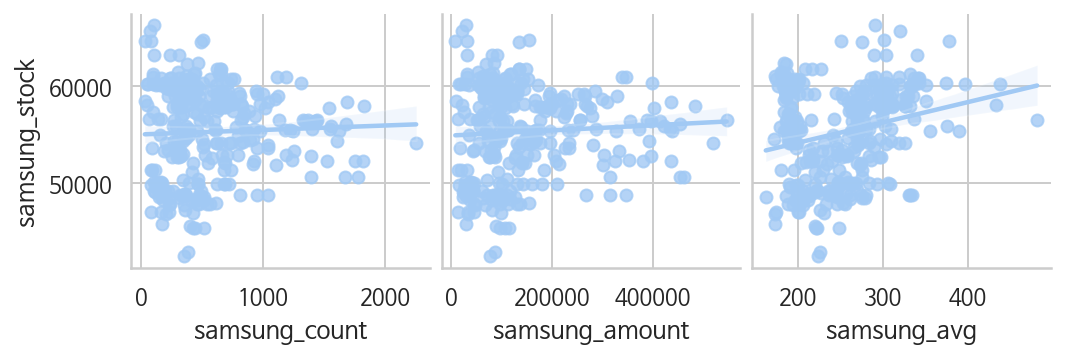

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(
    df1,
    x_vars = ["samsung_count","samsung_amount","samsung_avg"],
    y_vars = "samsung_stock",
    kind='reg'
)
plt.show()

In [ ]:
np.corrcoef(df1["samsung_amount"], df1["samsung_stock"])[0,1],np.corrcoef(df1["samsung_count"], df1["samsung_stock"])[0,1],np.corrcoef(df1["samsung_avg"], df1["samsung_stock"])[0,1]

(0.060239385882967685, 0.03880908426628262, 0.24015561347703876)

<Figure size 576x576 with 0 Axes>

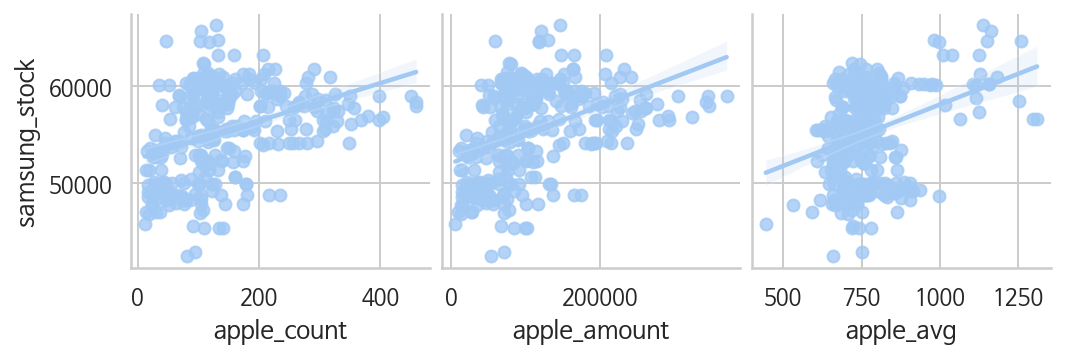

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(
    df1,
    x_vars = ["apple_count","apple_amount","apple_avg"],
    y_vars = "samsung_stock",
    kind='reg'
)
plt.show()

삼성전자의 주식이 삼성 자체의 미국내 실적과는 별 관련없이 움직이고 있고, 심지어 경쟁사인 애플과 비교하여 보았을 때에도 음의 상관관계 직선이 아닌 양의 상관관계 직선을 보이는 이상한 형태를 띄고 있다.

### 2020년 1월~11월 삼성전자 주가 변동

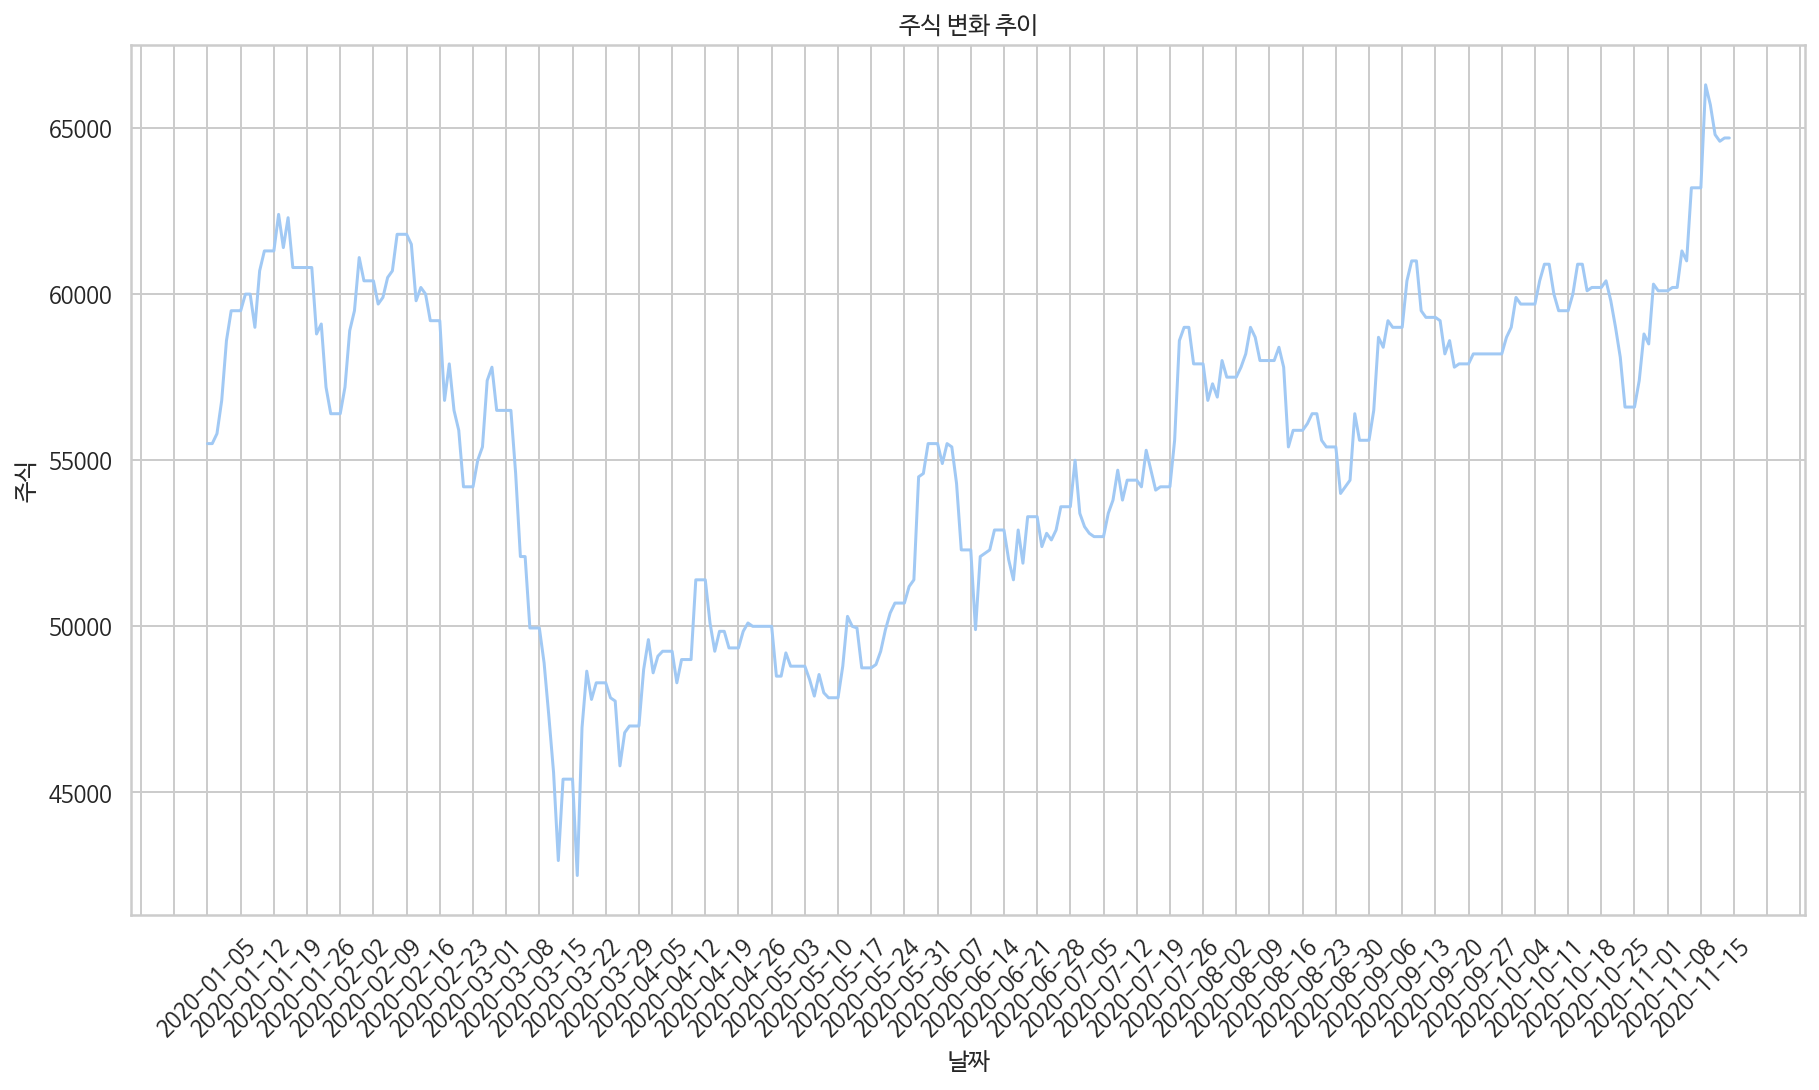

In [ ]:
sns.set_theme(style = "whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(y = "samsung_stock", x = "date", data = df1)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

g.set_title("주식 변화 추이")

g.set_xlabel("날짜")
g.set_ylabel("주식")

plt.show()

2020년의 주식시장이란, 특히 상반기라 하면, COVID-19이 전파되기 시작함으로써 급락하였던 시기였다.

이러한 상황에서, 삼성전자 주가의 급락이 시작되었다. 하지만 **삼성전자 세일한다**라는 말이 유행함과 동시에, **동학 개미 운동**이 시작되었다.당시 재차 코인 열풍이 일어났던 것을 생각해보면, 과연 아이작 뉴턴의 이러한 말이 떠오른다.

*천체의 움직임을 예측할 수는 있어도, 인간의 광기는 예측할 수 없다.*

...

결국 미국 시장 내 삼성의 실적 변화가 국내 삼성 주가에 끼치는 영향을 파악하는 것은 예상대로 무리인 것으로 드러났다.

또한 주식 자료를 주식 장 마감 가격이 아닌, 전날과 비교한 증감액을 데이터로 썼다면 더 좋지 않았을까 하는 아쉬움이 들었다.

하지만 당시의 삼성전자 주가는 판매 실적보다 다른 요인이 더 큰 영향을 끼친 것으로 보이므로, 설령 그렇다 하더라도 결과에 다른 특이점은 보이지 않았을 것으로 예상된다.

### 2020년 삼성전자 판매량 변화 추이

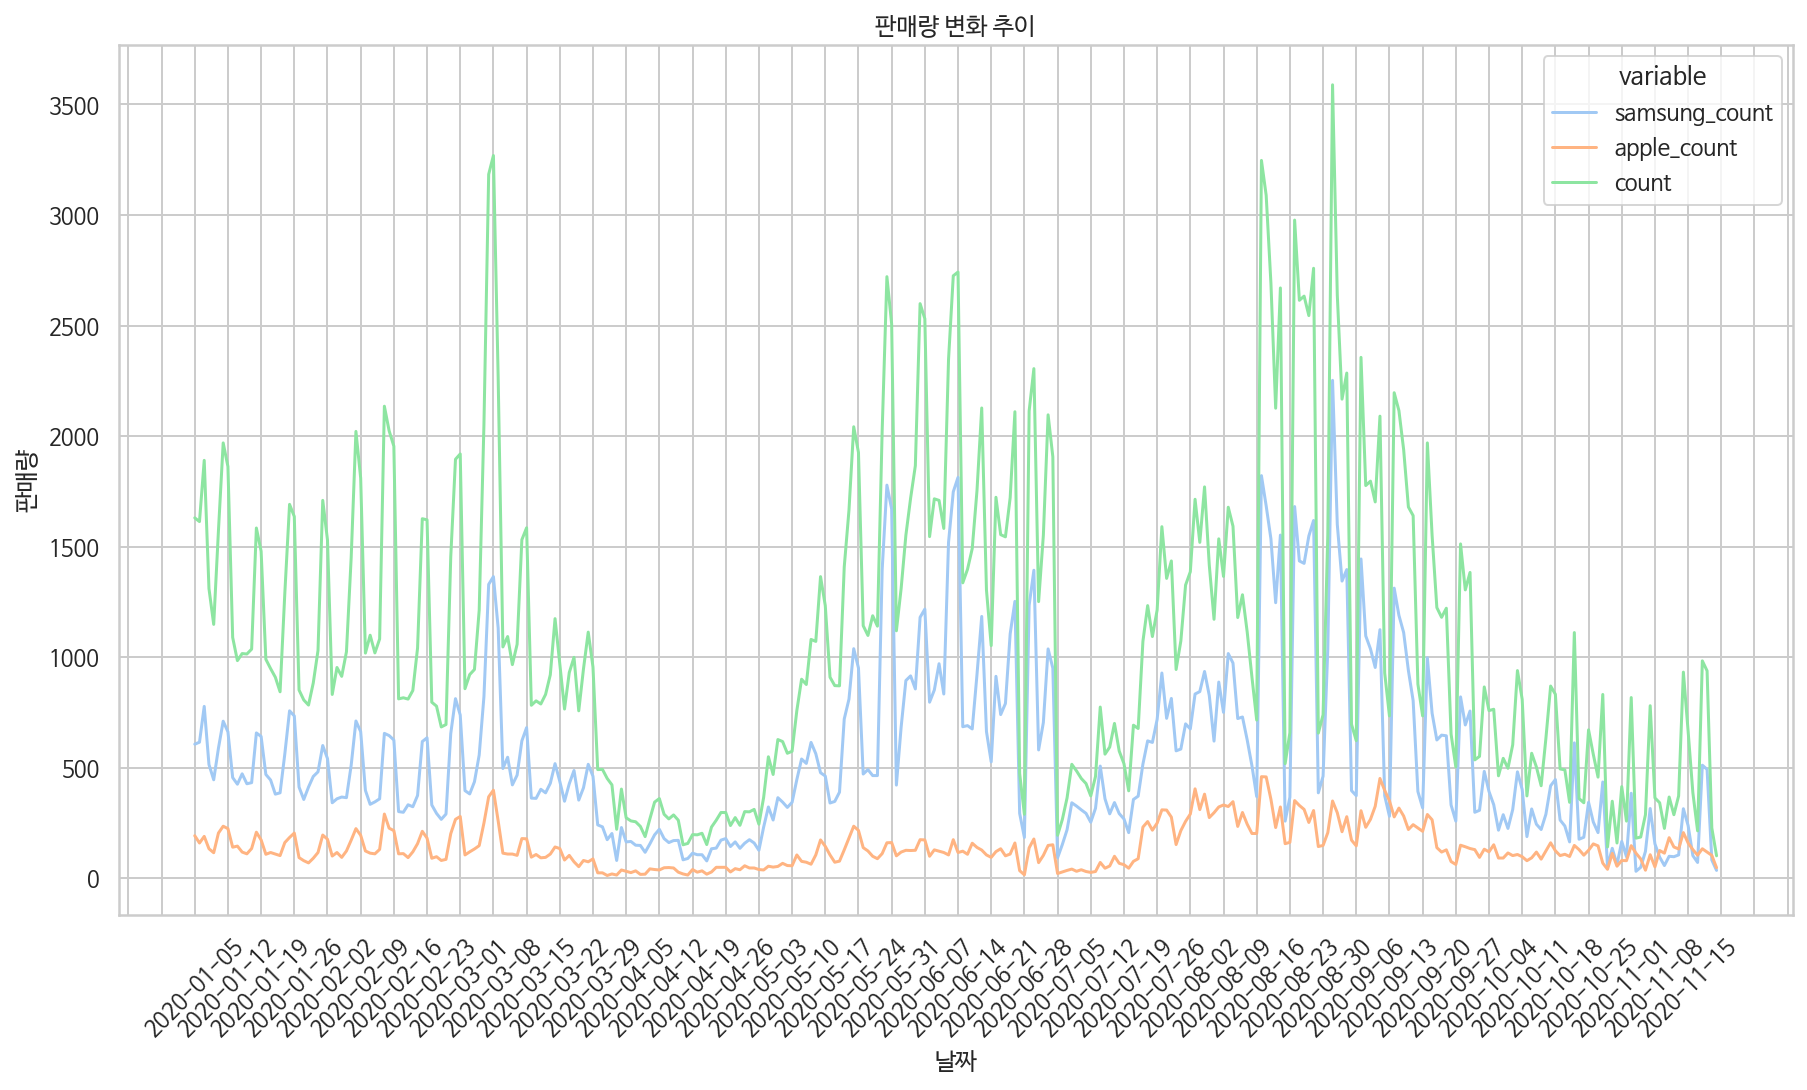

In [ ]:
sns.set_theme(style = "whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(y = "value", x = "date", hue = "variable", data = melted_df_count)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

g.set_title("판매량 변화 추이")

g.set_xlabel("날짜")
g.set_ylabel("판매량")

plt.show()

### 판매액 변화 추이

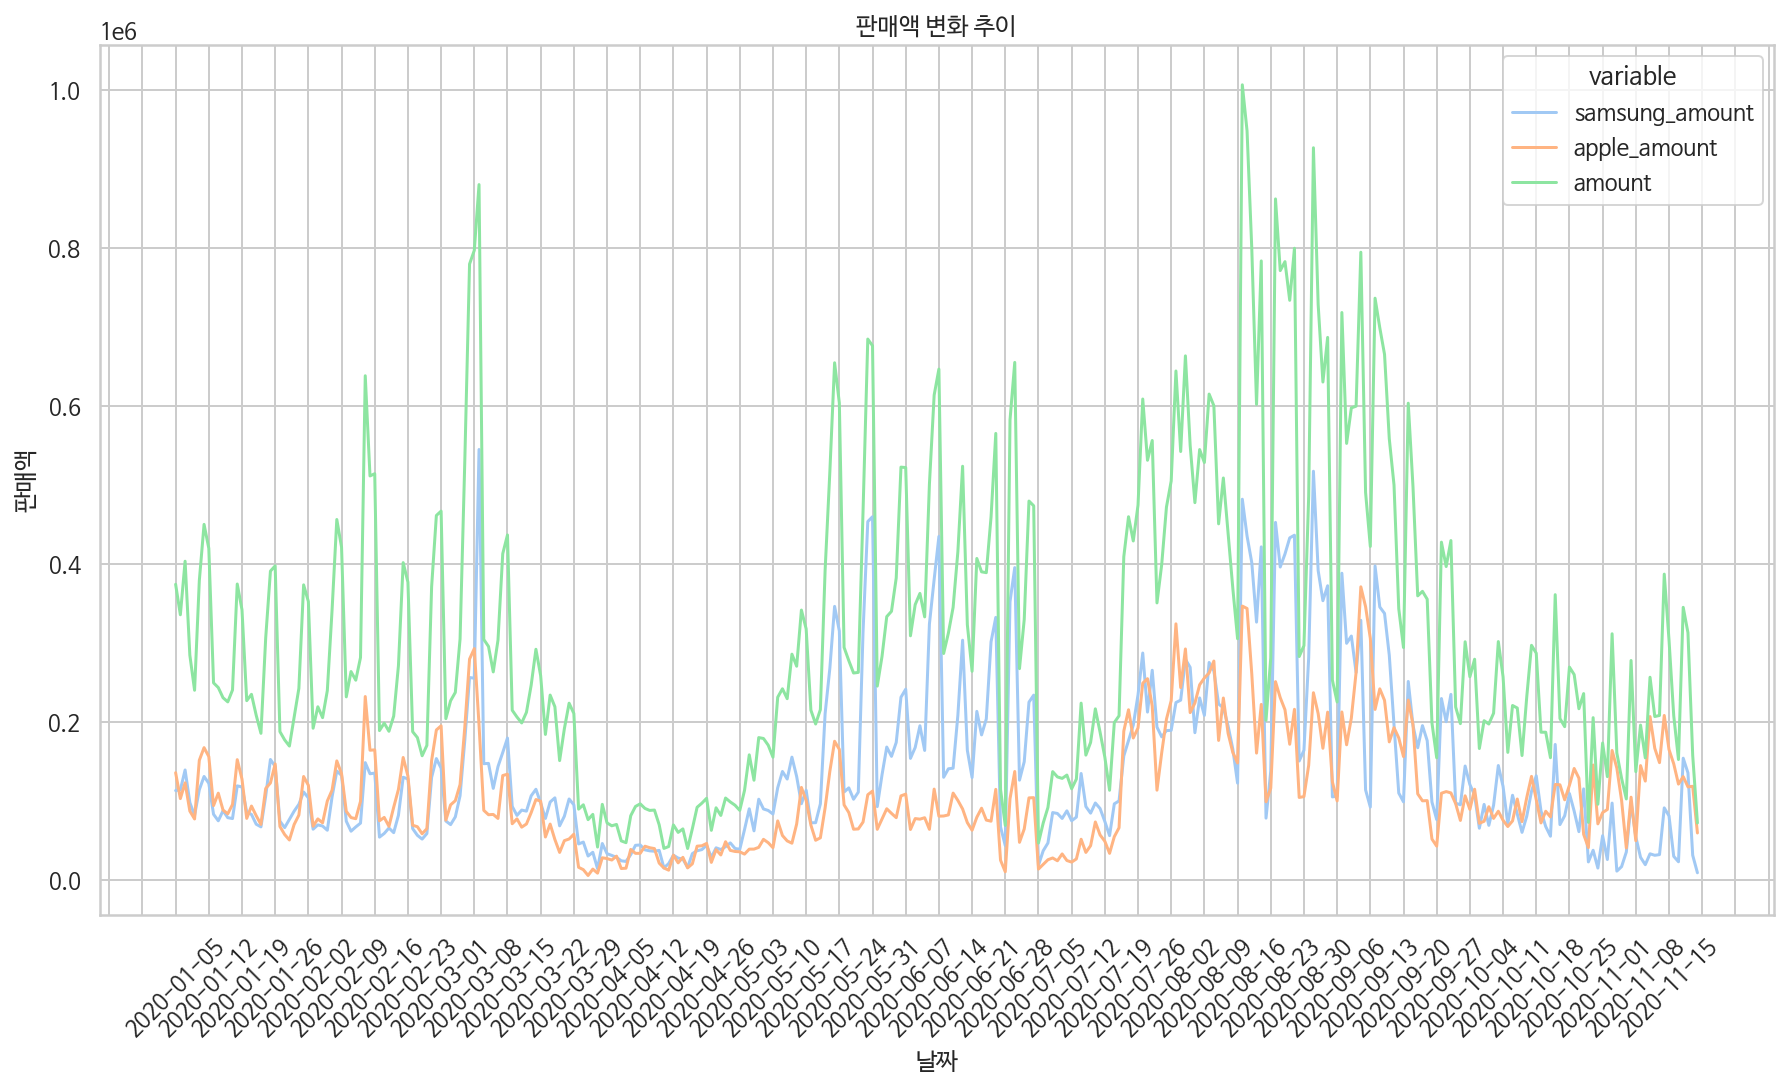

In [ ]:
sns.set_theme(style = "whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(y = "value", x = "date", hue = "variable", data = melted_df_amount)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

g.set_title("판매액 변화 추이")

g.set_xlabel("날짜")
g.set_ylabel("판매액")

plt.show()

### 애플과 삼성의 전체 대비 판매 비율 비교

하기하는 그래프에 나오는 점유율이란, 시장 전체의 점유율을 의미하는 것이 아닌 당이 거래에서 점유하는 비율을 의미한다.

In [ ]:
df2 = pd.DataFrame((df1["samsung_count"] / df1["count"] * 100) - (df1["apple_count"] / df1["count"] * 100))
df2["date"] = df1['date']
df2.rename(columns = {0:"점유율차이"},inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


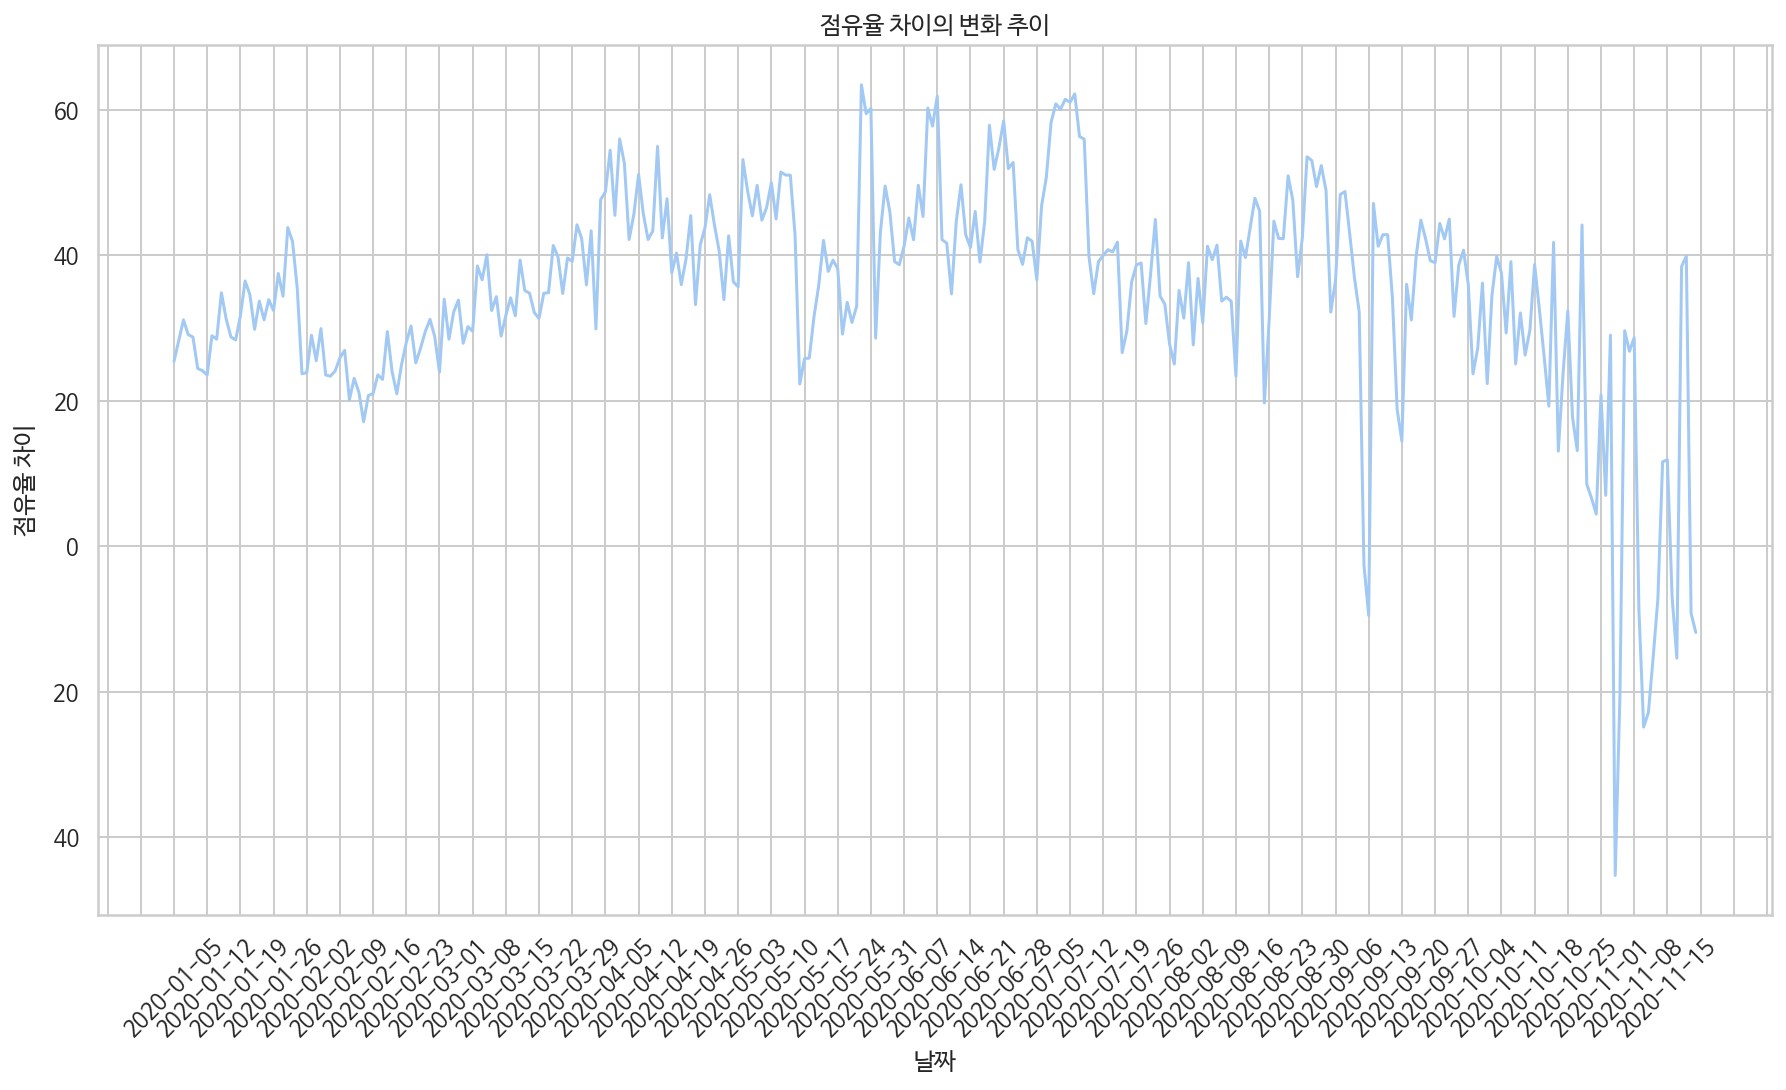

In [ ]:
sns.set_theme(style = "whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(y = "점유율차이", x = "date", data = df2)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

g.set_title("점유율 차이의 변화 추이")

g.set_xlabel("날짜")
g.set_ylabel("점유율 차이")

plt.show()

삼성이 꾸준히 더 많은 비율을 차지하고는 있지만, 7월 이후로는 되려 애플에 점유율을 내준 모습을 보인다.

### 대당 평균 가격 변화 추이

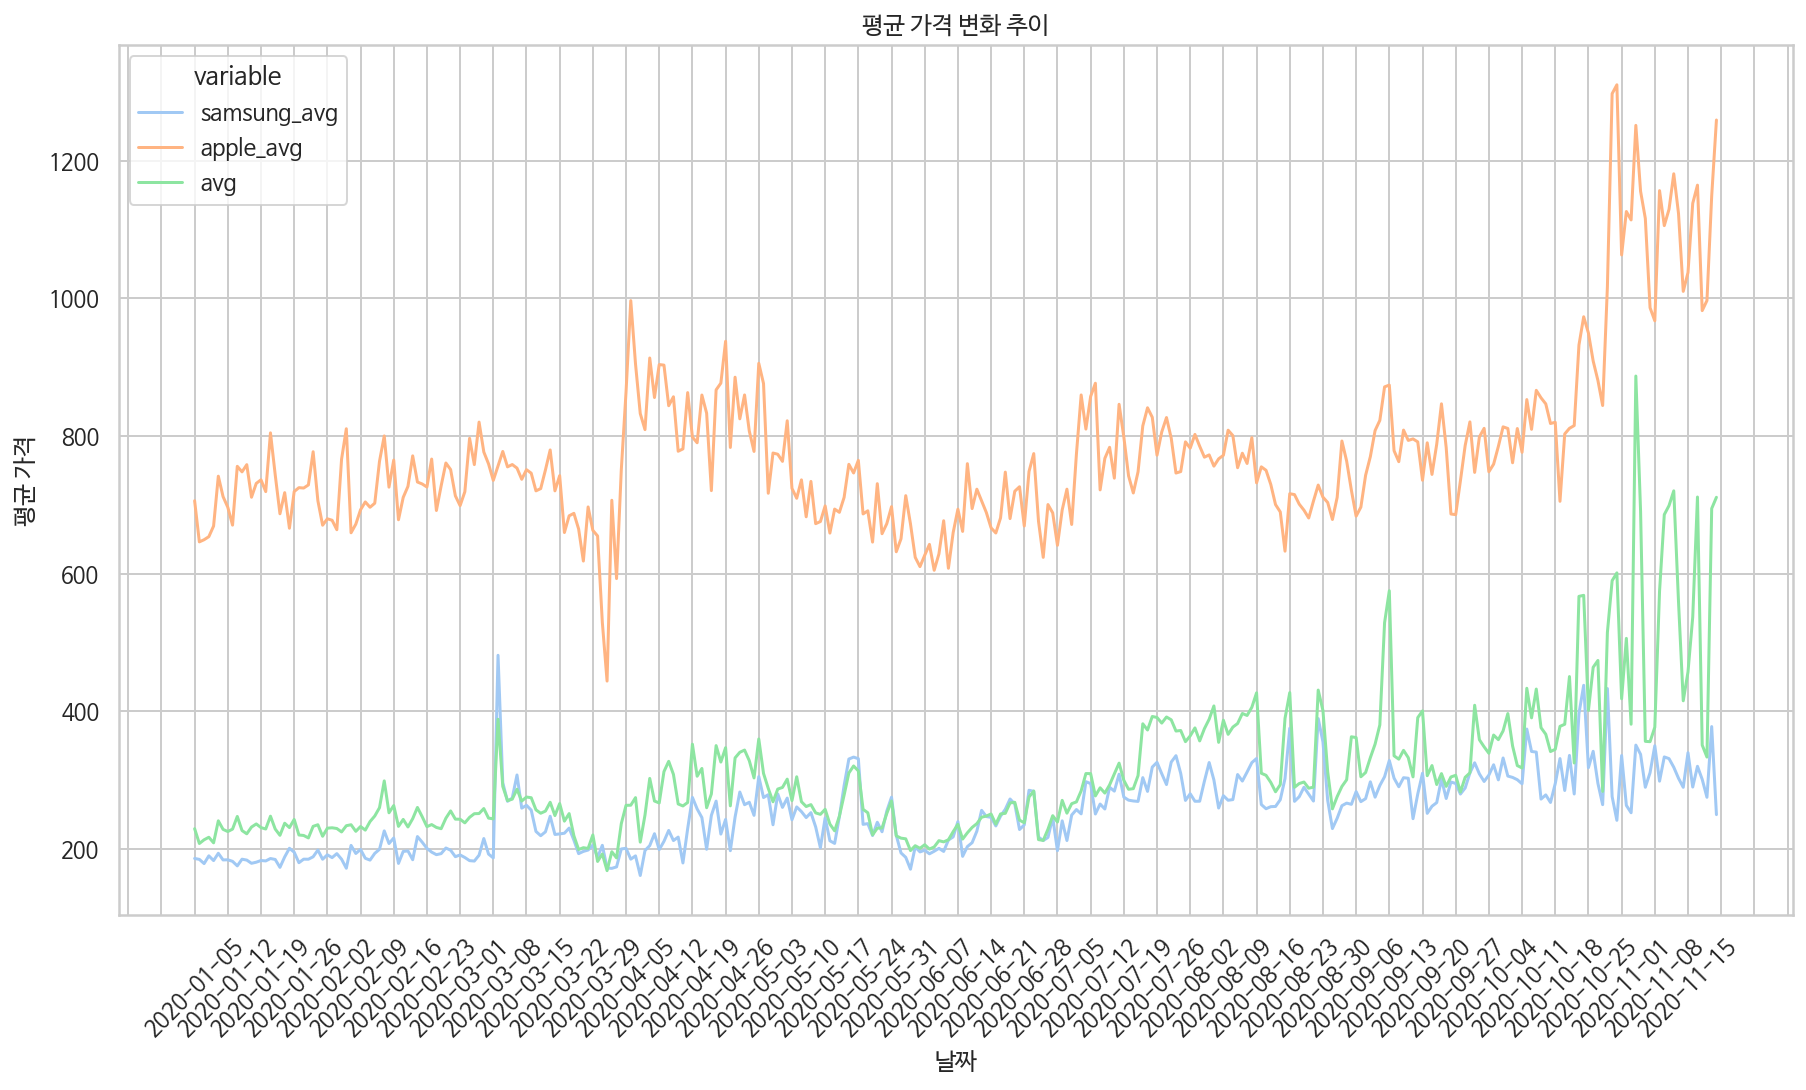

In [ ]:
sns.set_theme(style = "whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(y = "value", x = "date", hue = "variable", data = melted_df_avg)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

g.set_title("평균 가격 변화 추이")

g.set_xlabel("날짜")
g.set_ylabel("평균 가격")

plt.show()

삼성과 애플의 현격한 차이를 느낄 수 있다.

더욱이 이전 그래프의 결과를 생각해보면, 애플은 매우 높은 가격에도 불구하고 그정도의 점유율을 유지하고 있었음을 알 수 있다.

그 말인 곧 애플은 높은 브랜드 이미지와 함께 높은 고객 충성도를 유지하고 있다는 것을 의미한다.

반면 삼성은 갤럭시S 시리즈, 노트 시리즈 등을 플래그쉽으로 내세우며 프리미엄 스마트폰 시장을 공략하고자 한 것과 달리, 결국 해외에서의 주된 판매전략은 박리다매였던 것으로 파악된다.

현재 시점에서 GOS 사태와 연관지어 생각해보고자 한다.

단순히 말하면 이렇다. 기술적인 혁신은 더이상 예전같지 않다. 그럼에도 이전과 같은 박리다매 기조를 유지하면서도 더 높은 이윤을 창출하기 위해 비용을 절감하니 이러한 사태가 일어난 것이다.

애플과 삼성이 시장에서 차지하는 위치는 